# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Importing Data

In [2]:
#create path
path = r'C:\Users\smerg\Instacart Grocery Basket Analysis'

In [3]:
# Importing data
instacart = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_final_filtered.csv'))


C:\Users\smerg\AppData\Local\Temp\ipykernel_1580\167233320.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  instacart = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_final_filtered.csv'))


### creating visualizations

In [4]:
# Display all column names
columns = instacart.columns
print(columns)


Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'median_days_since_prior_order',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'family_status', 'income', 'Region',
       'exclusion_flag', 'profile'],
      dtype='object')


In [5]:

# Map numeric days to actual day names
day_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
instacart['days_of_week'] = instacart['order_dow'].map(day_mapping)

# Count the number of orders for each day
busiest_days = instacart['days_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

print(busiest_days)  # Optional: to see the counts


days_of_week
Monday       5120546
Tuesday      3805570
Wednesday    3466631
Thursday     3425703
Friday       3813820
Saturday     4053813
Sunday       5585907
Name: count, dtype: int64


C:\Users\smerg\AppData\Local\Temp\ipykernel_1580\381002302.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=busiest_days.index, y=busiest_days.values, palette="viridis")


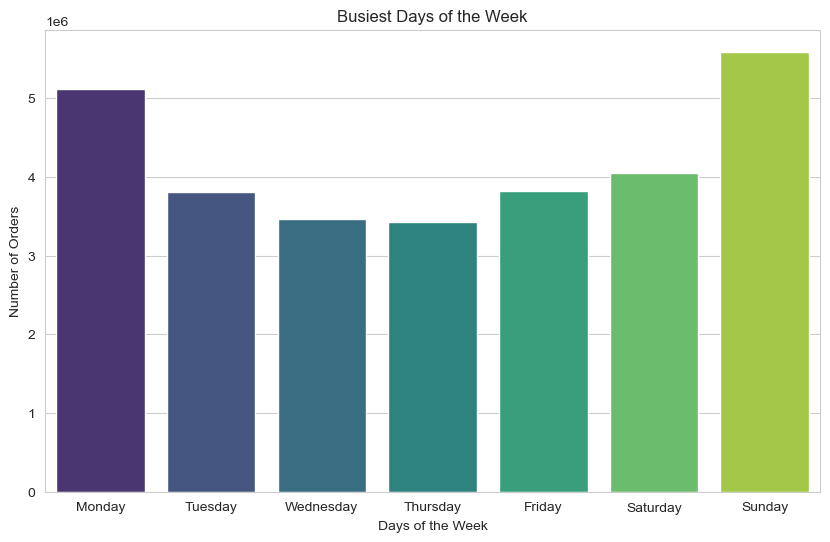

In [6]:
# Set the visual style
sns.set_style("whitegrid")

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=busiest_days.index, y=busiest_days.values, palette="viridis")

# Add labels and title
plt.xlabel('Days of the Week')
plt.ylabel('Number of Orders')
plt.title('Busiest Days of the Week')

# Show the plot
plt.show()


In [7]:

# Count the number of orders for each hour
hourly_orders = instacart['order_hour_of_day'].value_counts().sort_index()

print(hourly_orders)  # Optional: to see the counts


order_hour_of_day
0      196508
1      103477
2       61677
3       45406
4       47078
5       79868
6      266036
7      815272
8     1568406
9     2235288
10    2504012
11    2471359
12    2358336
13    2402864
14    2429098
15    2400042
16    2283702
17    1874951
18    1463666
19    1128991
20     878621
21     721890
22     573329
23     362113
Name: count, dtype: int64


C:\Users\smerg\AppData\Local\Temp\ipykernel_1580\2862254603.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_orders.index, y=hourly_orders.values, palette="plasma")


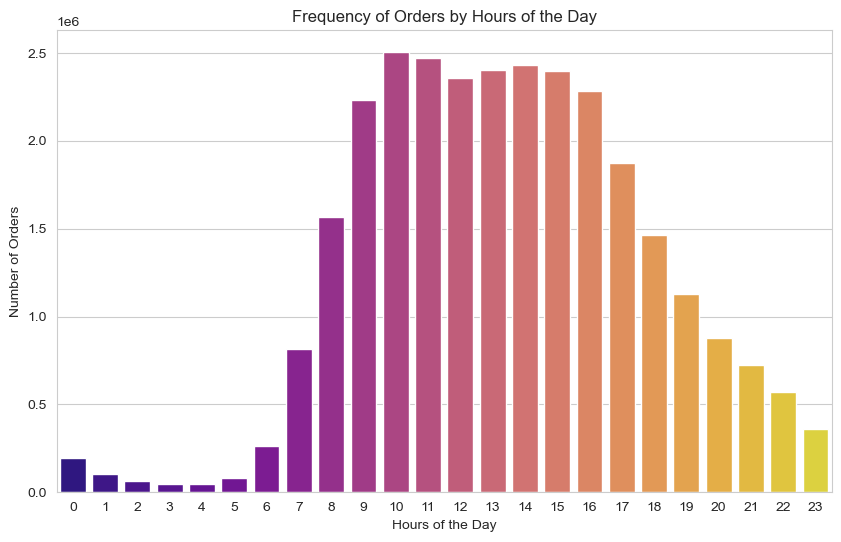

In [8]:
# Set the visual style
sns.set_style("whitegrid")

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_orders.index, y=hourly_orders.values, palette="plasma")

# Add labels and title
plt.xlabel('Hours of the Day')
plt.ylabel('Number of Orders')
plt.title('Frequency of Orders by Hours of the Day')

# Show the plot
plt.show()


In [9]:

# Calculate the average price for each hour
avg_price_by_hour = instacart.groupby('order_hour_of_day')['prices'].mean()

print(avg_price_by_hour)  # Optional: to see the average prices by hour


order_hour_of_day
0     10.572610
1     10.111800
2     14.841443
3     12.985841
4     10.050561
5     13.130921
6     11.976311
7     12.084837
8     12.433432
9     11.751691
10    11.745459
11    12.095598
12    11.759574
13    11.500750
14    11.758256
15    12.114133
16    12.328307
17    12.496866
18    11.818636
19    12.344228
20    11.347355
21    10.785530
22    10.013342
23    10.537921
Name: prices, dtype: float64


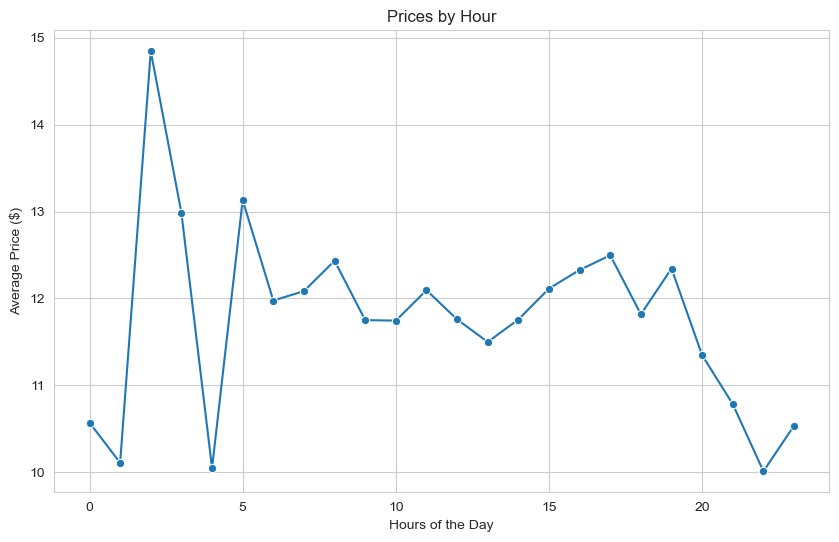

In [10]:
# Set the visual style
sns.set_style("whitegrid")

# Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_price_by_hour.index, y=avg_price_by_hour.values, marker='o')

# Add labels and title
plt.xlabel('Hours of the Day')
plt.ylabel('Average Price ($)')
plt.title('Prices by Hour')

# Show the plot
plt.show()


In [11]:

# Map numeric days to actual day names
day_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
instacart['days_of_week'] = instacart['order_dow'].map(day_mapping)

# Calculate the average price for each day of the week
avg_price_by_day = instacart.groupby('days_of_week')['prices'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

print(avg_price_by_day)  # Optional: to see the average prices by day


days_of_week
Monday       12.070009
Tuesday      12.120033
Wednesday    12.207111
Thursday     11.823595
Friday       12.755775
Saturday     11.228020
Sunday       11.186046
Name: prices, dtype: float64


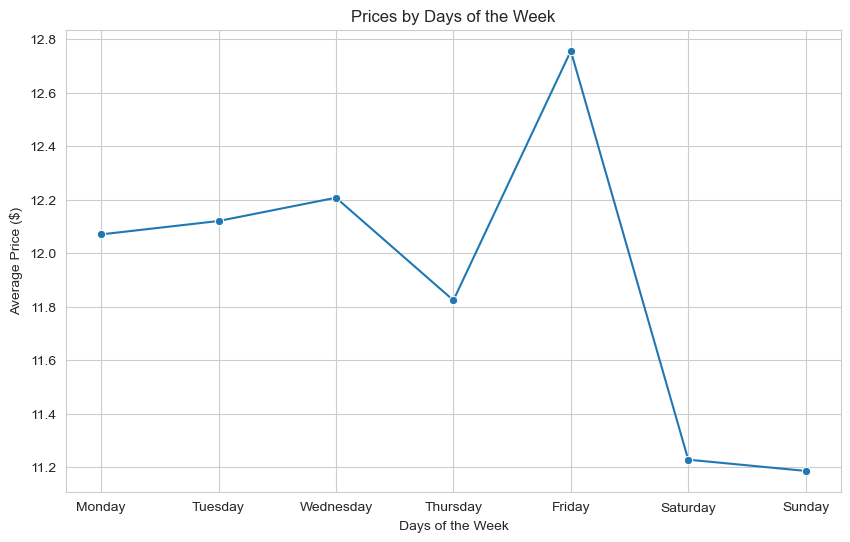

In [12]:
# Set the visual style
sns.set_style("whitegrid")

# Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_price_by_day.index, y=avg_price_by_day.values, marker='o')

# Add labels and title
plt.xlabel('Days of the Week')
plt.ylabel('Average Price ($)')
plt.title('Prices by Days of the Week')

# Show the plot
plt.show()


In [13]:
# Define the price ranges
bins = [0, 5, 10, float('inf')]  # Adjust these bins as per your dataset
labels = ['Low', 'Mid', 'High']

# Create a new column for the price category
instacart['price_range'] = pd.cut(instacart['prices'], bins=bins, labels=labels)

# Count the number of orders for each price range
orders_by_price_range = instacart['price_range'].value_counts()

print(orders_by_price_range)  # Optional: to see the count of orders by price range


price_range
Mid     10629626
High     9497932
Low      9144432
Name: count, dtype: int64


C:\Users\smerg\AppData\Local\Temp\ipykernel_1580\613902459.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders_by_price_range.index, y=orders_by_price_range.values, palette="coolwarm")


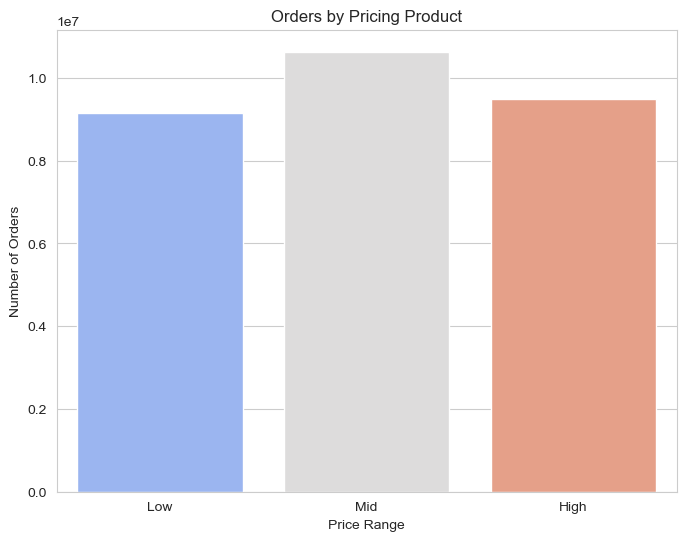

In [14]:
# Set the visual style
sns.set_style("whitegrid")

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=orders_by_price_range.index, y=orders_by_price_range.values, palette="coolwarm")

# Add labels and title
plt.xlabel('Price Range')
plt.ylabel('Number of Orders')
plt.title('Orders by Pricing Product')

# Show the plot
plt.show()


In [15]:
# Group by department and product, then count the number of orders
product_sales = instacart.groupby(['department_id', 'product_name'])['order_id'].count().reset_index()

# Rename the column to reflect that it's a count of orders
product_sales.rename(columns={'order_id': 'total_orders'}, inplace=True)

# Find the top product for each department by sorting and dropping duplicates
top_products_per_dept = product_sales.sort_values('total_orders', ascending=False).drop_duplicates('department_id')

print(top_products_per_dept)  # Optional: to see the top products per department


       department_id                                      product_name  \
6184               4                                            Banana   
35432             16                                Organic Whole Milk   
13601              7                        Sparkling Water Grapefruit   
47866             20                                   Original Hummus   
4561               3                            100% Whole Wheat Bread   
280                1                                       Blueberries   
26033             13                            Extra Virgin Olive Oil   
23882             12                 Boneless Skinless Chicken Breasts   
32181             15                               Organic Black Beans   
36663             17                        100% Recycled Paper Towels   
30452             14                                Honey Nut Cheerios   
43709             19              Lightly Salted Baked Snap Pea Crisps   
16073              9                  

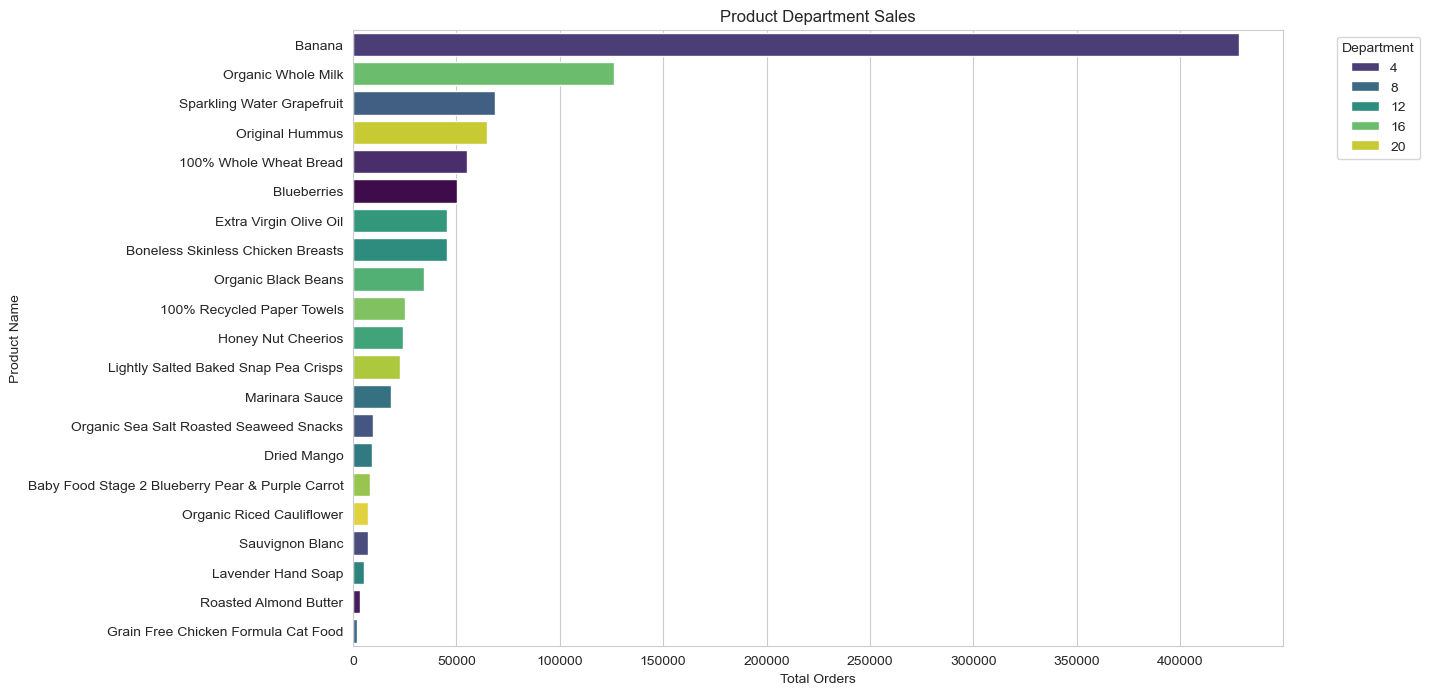

In [16]:
# Set the visual style
sns.set_style("whitegrid")

# Create the horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='total_orders', y='product_name', data=top_products_per_dept, hue='department_id', dodge=False, palette="viridis")

# Add labels and title
plt.xlabel('Total Orders')
plt.ylabel('Product Name')
plt.title('Product Department Sales')

# Adjust the legend
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


In [17]:
# Count the number of customers in each loyalty category
loyalty_counts = instacart['loyalty_flag'].value_counts()

# Calculate the percentage of customers in each category
loyalty_percentage = (loyalty_counts / loyalty_counts.sum()) * 100

print(loyalty_percentage)  # Optional: to see the percentage of customers by loyalty segment


loyalty_flag
Regular Customer    51.314489
Loyal Customer      33.163697
New Customer        15.521815
Name: count, dtype: float64


C:\Users\smerg\AppData\Local\Temp\ipykernel_1580\347963306.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loyalty_counts.index, y=loyalty_counts.values, palette="Blues_d")


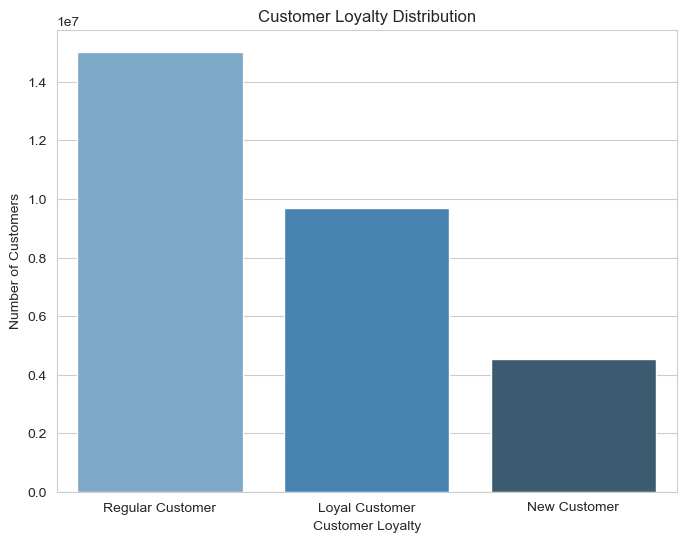

In [18]:
# Set the visual style
sns.set_style("whitegrid")

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=loyalty_counts.index, y=loyalty_counts.values, palette="Blues_d")

# Add labels and title
plt.xlabel('Customer Loyalty')
plt.ylabel('Number of Customers')
plt.title('Customer Loyalty Distribution')

# Show the plot
plt.show()

In [19]:
# Sample DataFrame (replace with your actual data)
# instacart_df = pd.read_csv("path/to/your/instacart_dataset.csv")

# Count the number of customers in each loyalty category
loyalty_counts = instacart['loyalty_flag'].value_counts()

# Calculate the percentage of customers in each category
loyalty_percentage = (loyalty_counts / loyalty_counts.sum()) * 100

print(loyalty_percentage)  # Optional: to see the percentage of customers by loyalty segment


loyalty_flag
Regular Customer    51.314489
Loyal Customer      33.163697
New Customer        15.521815
Name: count, dtype: float64


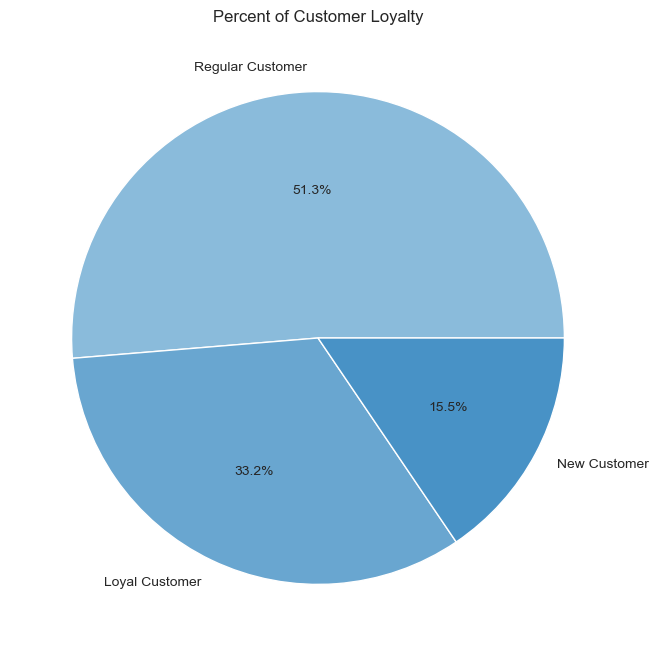

In [20]:
# Set the visual style
sns.set_style("whitegrid")

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(loyalty_percentage, labels=loyalty_percentage.index, autopct='%1.1f%%', colors=sns.color_palette("Blues_d"))

# Add title
plt.title('Percent of Customer Loyalty')

# Show the plot
plt.show()


In [21]:
# Count the number of customers in each loyalty and spending category
loyalty_spending_counts = instacart.groupby(['loyalty_flag', 'spending_flag']).size().unstack()

print(loyalty_spending_counts)  # Optional: to see the counts


spending_flag     High spender  Low spender
loyalty_flag                               
Loyal Customer          200486      9507188
New Customer             79304      4464240
Regular Customer        286487     14734285


<Figure size 1000x600 with 0 Axes>

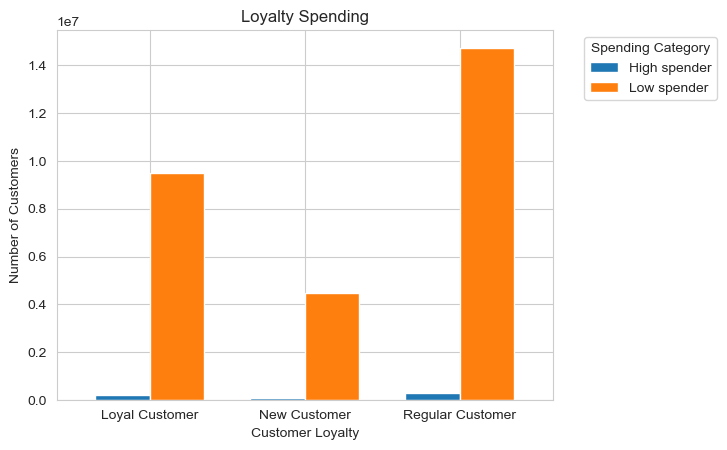

In [22]:
# Set the visual style
sns.set_style("whitegrid")

# Create the side-by-side bar chart
plt.figure(figsize=(10, 6))
loyalty_spending_counts.plot(kind='bar', stacked=False, color=['#1f77b4', '#ff7f0e'], width=0.7)

# Add labels and title
plt.xlabel('Customer Loyalty')
plt.ylabel('Number of Customers')
plt.title('Loyalty Spending')
plt.xticks(rotation=0)

# Adjust the legend
plt.legend(title='Spending Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


In [23]:
# Filter the DataFrame to include only the specified regions
filtered = instacart[instacart['Region'].isin(['Midwest', 'Northeast', 'West', 'South'])]

# Display the unique regions to confirm the filtering
print("Unique Regions after filtering:")
print(filtered['Region'].unique())


Unique Regions after filtering:
['Midwest' 'Northeast' 'West' 'South']


In [24]:
# Filter the DataFrame to include only the specified regions
filtered = instacart[instacart['Region'].isin(['Midwest', 'Northeast', 'West', 'South'])]

# Define a function to categorize the hours into periods
def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'  # Optionally, you can exclude "Night" if it’s not relevant


In [25]:
# Apply the function to create a new column
filtered['Time_of_Day'] = filtered['order_hour_of_day'].apply(categorize_time_of_day)

# Group by Region and Time_of_Day, and count the number of orders
time_region_group = filtered.groupby(['Region', 'Time_of_Day']).size().unstack().fillna(0)


C:\Users\smerg\AppData\Local\Temp\ipykernel_1580\1372743310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Time_of_Day'] = filtered['order_hour_of_day'].apply(categorize_time_of_day)


<Figure size 1200x800 with 0 Axes>

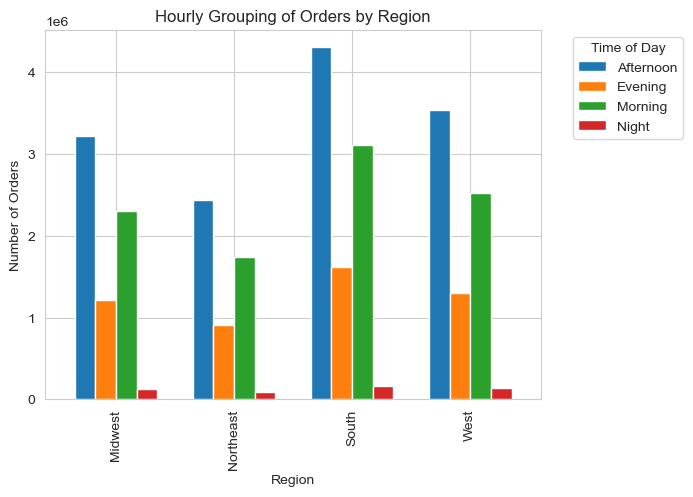

In [26]:
# Set the visual style
sns.set_style("whitegrid")

# Create the side-by-side bar chart
plt.figure(figsize=(12, 8))
time_region_group.plot(kind='bar', stacked=False, width=0.7)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.title('Hourly Grouping of Orders by Region')

# Adjust the legend
plt.legend(title='Time of Day', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

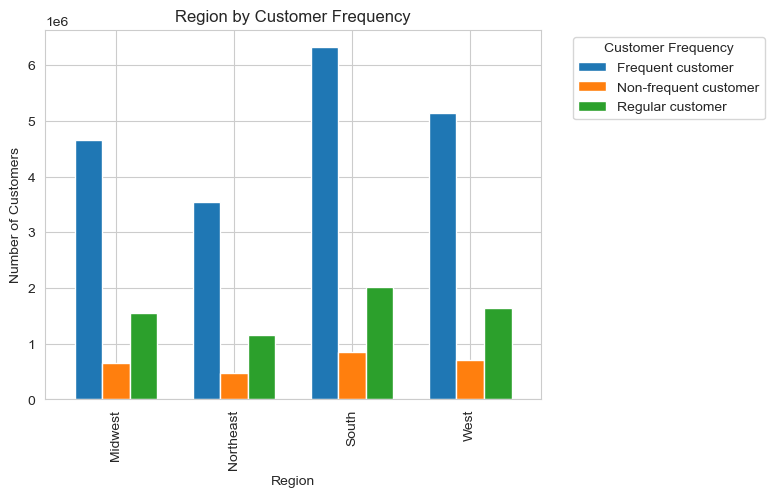

In [27]:
# Filter the DataFrame to include only the specified regions
filtered = instacart[instacart['Region'].isin(['Midwest', 'Northeast', 'West', 'South'])]

# Group by Region and order_frequency_flag, and count the number of customers
frequency_region_group = filtered.groupby(['Region', 'order_frequency_flag']).size().unstack().fillna(0)

# Set the visual style
sns.set_style("whitegrid")

# Create the side-by-side bar chart
plt.figure(figsize=(12, 8))
frequency_region_group.plot(kind='bar', stacked=False, width=0.7)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.title('Region by Customer Frequency')

# Adjust the legend
plt.legend(title='Customer Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

C:\Users\smerg\AppData\Local\Temp\ipykernel_1580\1527457177.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=busiest_days.index, y=busiest_days.values, palette="viridis")


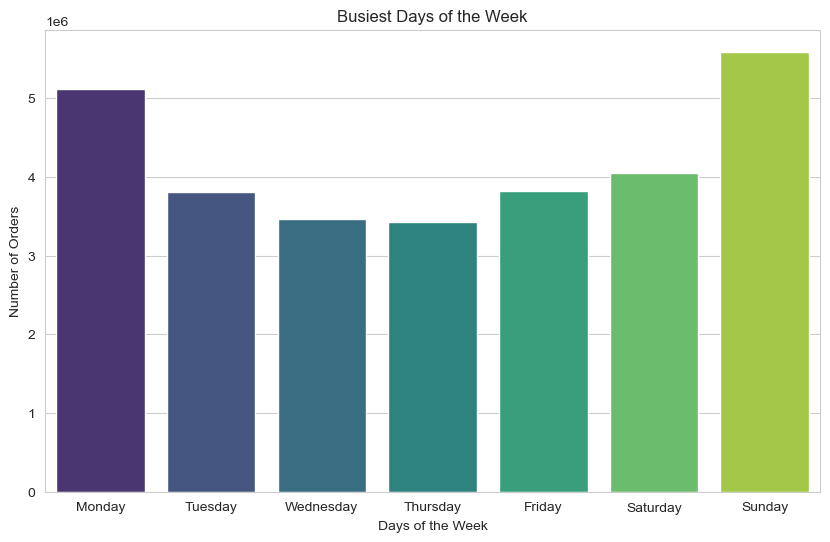

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x=busiest_days.index, y=busiest_days.values, palette="viridis")
plt.xlabel('Days of the Week')
plt.ylabel('Number of Orders')
plt.title('Busiest Days of the Week')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'busiest_days_of_week.png'))
plt.show()


C:\Users\smerg\AppData\Local\Temp\ipykernel_1580\3184418090.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_orders.index, y=hourly_orders.values, palette="plasma")


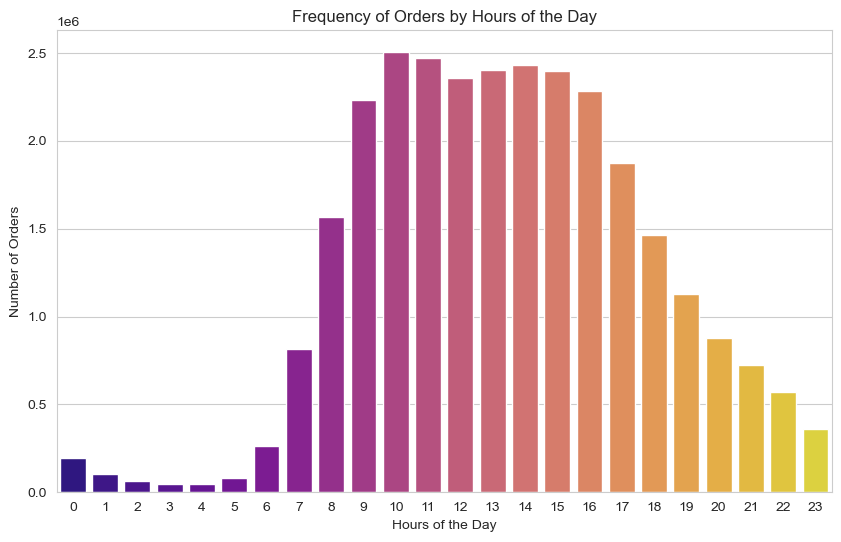

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_orders.index, y=hourly_orders.values, palette="plasma")
plt.xlabel('Hours of the Day')
plt.ylabel('Number of Orders')
plt.title('Frequency of Orders by Hours of the Day')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_hour.png'))
plt.show()


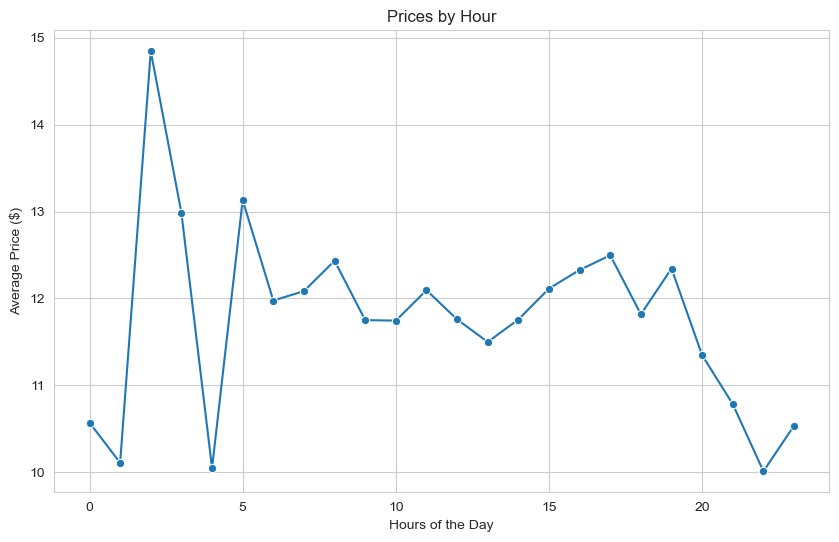

In [30]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_price_by_hour.index, y=avg_price_by_hour.values, marker='o')
plt.xlabel('Hours of the Day')
plt.ylabel('Average Price ($)')
plt.title('Prices by Hour')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_by_hour.png'))
plt.show()



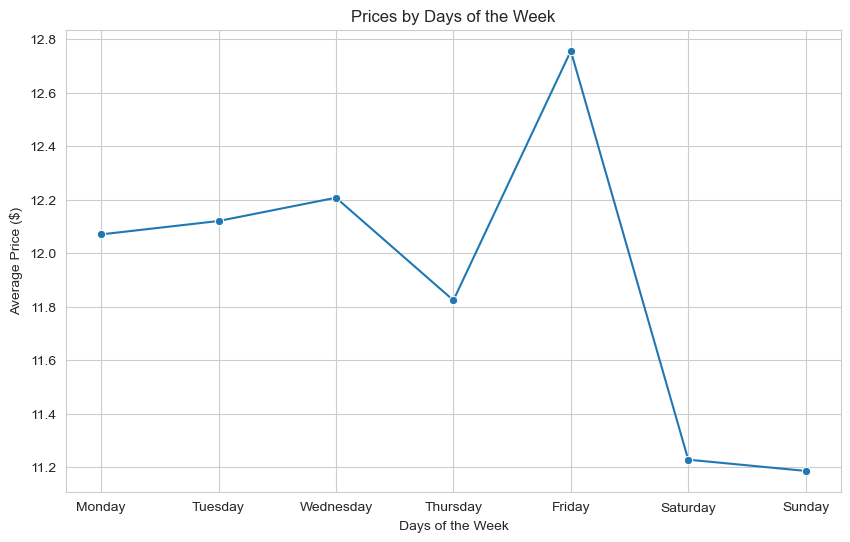

In [31]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_price_by_day.index, y=avg_price_by_day.values, marker='o')
plt.xlabel('Days of the Week')
plt.ylabel('Average Price ($)')
plt.title('Prices by Days of the Week')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_by_days_of_week.png'))
plt.show()


C:\Users\smerg\AppData\Local\Temp\ipykernel_1580\2133671641.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders_by_price_range.index, y=orders_by_price_range.values, palette="coolwarm")


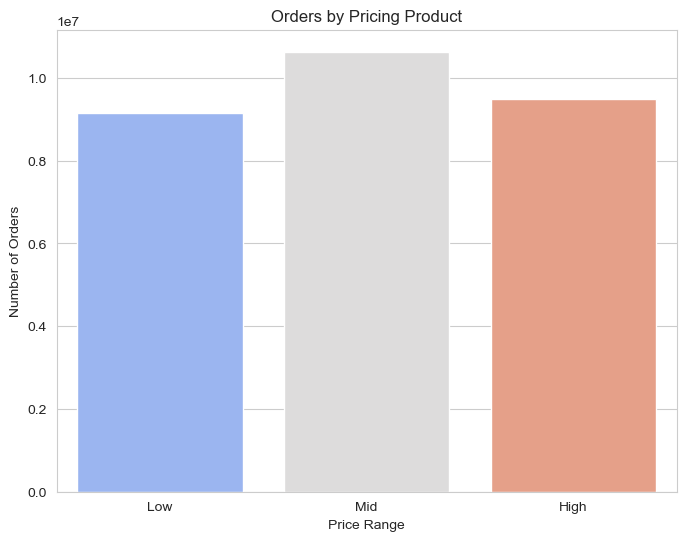

In [32]:
plt.figure(figsize=(8, 6))
sns.barplot(x=orders_by_price_range.index, y=orders_by_price_range.values, palette="coolwarm")
plt.xlabel('Price Range')
plt.ylabel('Number of Orders')
plt.title('Orders by Pricing Product')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_pricing_product.png'))
plt.show()


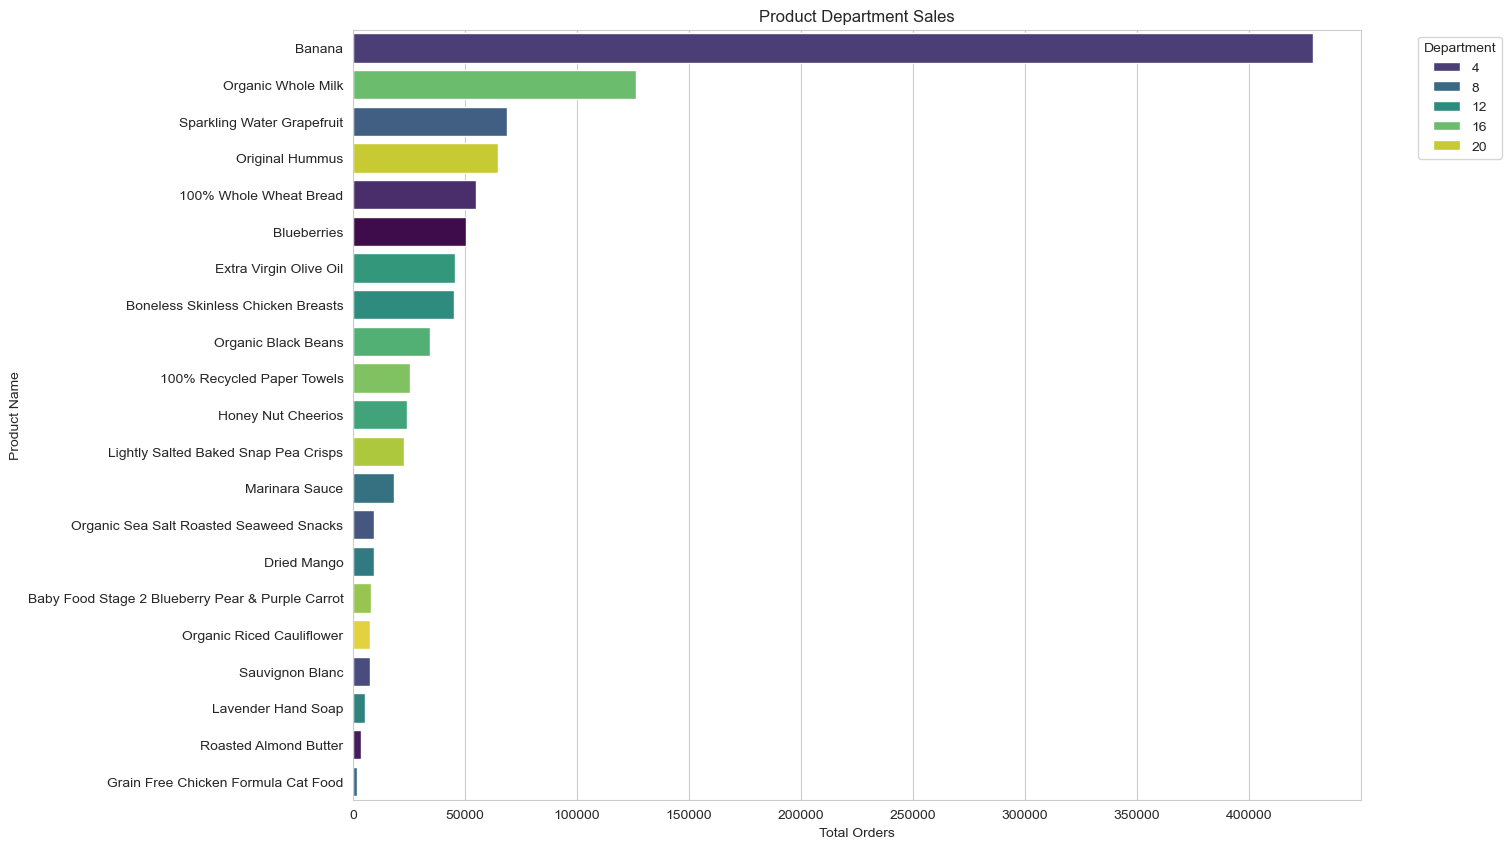

In [33]:
plt.figure(figsize=(13, 10))
sns.barplot(x='total_orders', y='product_name', data=top_products_per_dept, hue='department_id', dodge=False, palette="viridis")
plt.xlabel('Total Orders')
plt.ylabel('Product Name')
plt.title('Product Department Sales')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'product_department_sales.png'))
plt.show()


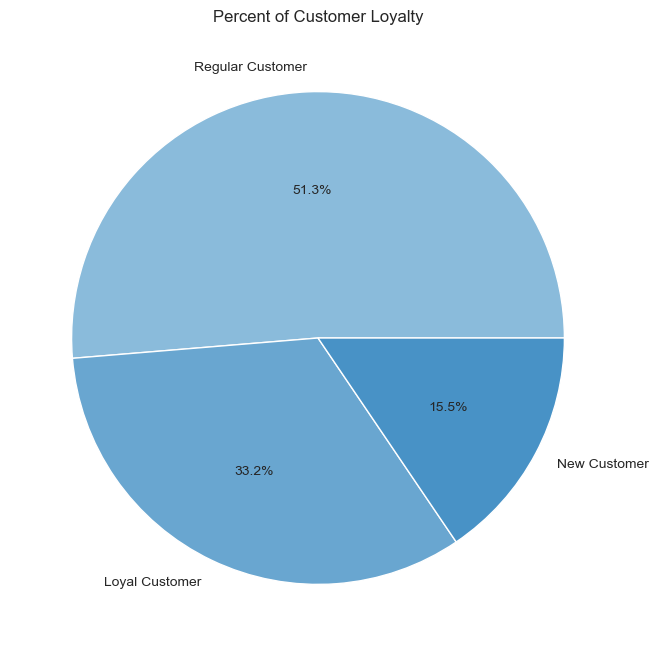

In [34]:
plt.figure(figsize=(8, 8))
plt.pie(loyalty_percentage, labels=loyalty_percentage.index, autopct='%1.1f%%', colors=sns.color_palette("Blues_d"))
plt.title('Percent of Customer Loyalty')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'percent_of_customer_loyalty.png'))
plt.show()


<Figure size 1200x800 with 0 Axes>

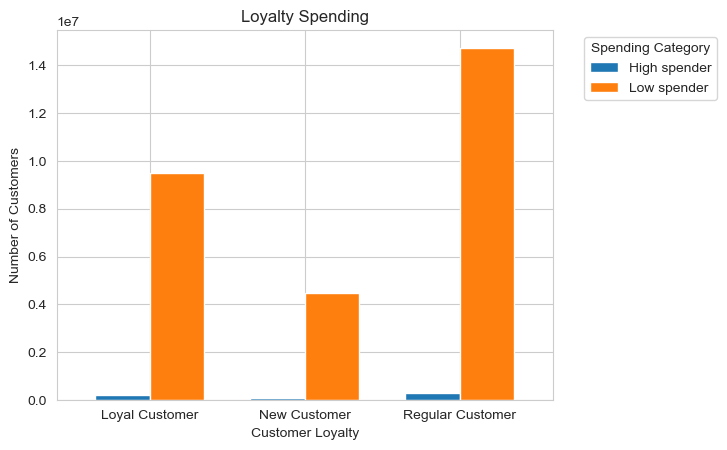

In [35]:
plt.figure(figsize=(12, 8))
loyalty_spending_counts.plot(kind='bar', stacked=False, color=['#1f77b4', '#ff7f0e'], width=0.7)
plt.xlabel('Customer Loyalty')
plt.ylabel('Number of Customers')
plt.title('Loyalty Spending')
plt.xticks(rotation=0)
plt.legend(title='Spending Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_spending.png'))
plt.show()


<Figure size 2000x2000 with 0 Axes>

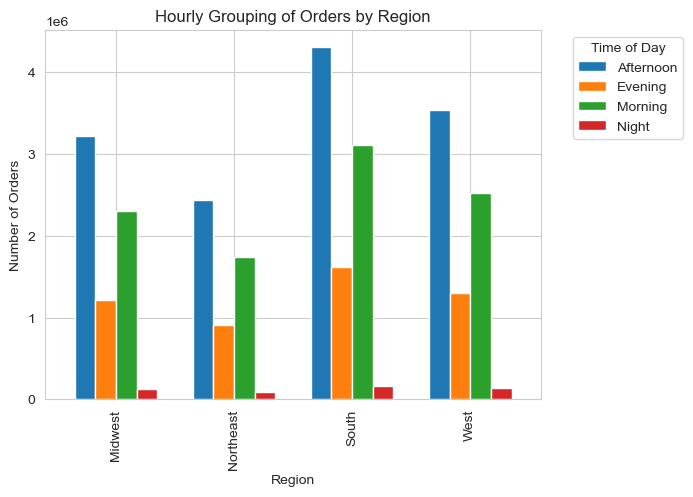

In [36]:
plt.figure(figsize=(20, 20))
time_region_group.plot(kind='bar', stacked=False, width=0.7)
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.title('Hourly Grouping of Orders by Region')
plt.legend(title='Time of Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hourly_grouping_by_region.png'))
plt.show()


<Figure size 1200x1000 with 0 Axes>

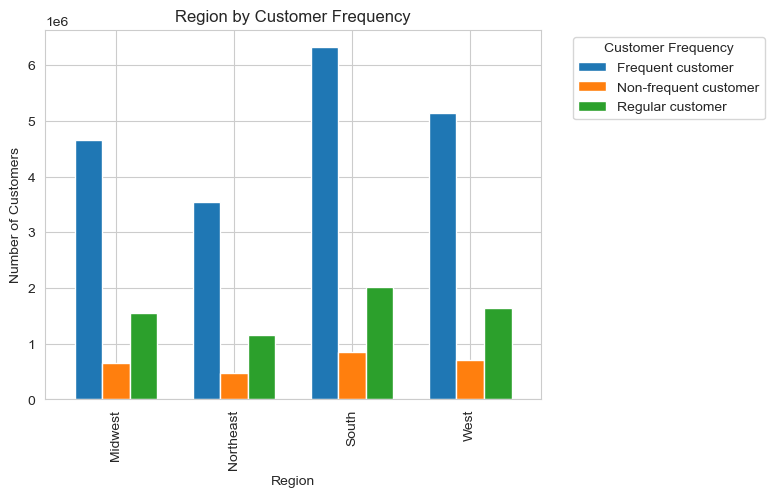

In [37]:
plt.figure(figsize=(12, 10))
frequency_region_group.plot(kind='bar', stacked=False, width=0.7)
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.title('Region by Customer Frequency')
plt.legend(title='Customer Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_by_customer_frequency.png'))
plt.show()


In [45]:
# Sample DataFrame (replace with your actual data)
# instacart_df = pd.read_csv("path/to/your/instacart_dataset.csv")

# Define a function to categorize customers by income level
def categorize_income(income):
    if income < 40000:
        return 'Low Income'
    elif 40000 <= income < 100000:
        return 'Middle Income'
    else:
        return 'High Income'

# Apply the function to create a new column for income group
instacart['Income_Group'] = instacart['income'].apply(categorize_income)

# Calculate the percentage of each income group
income_group_percentage = instacart['Income_Group'].value_counts(normalize=True) * 100

print(income_group_percentage)  # Optional: to check the percentage result


Income_Group
Middle Income    48.904372
High Income      45.902885
Low Income        5.192742
Name: proportion, dtype: float64


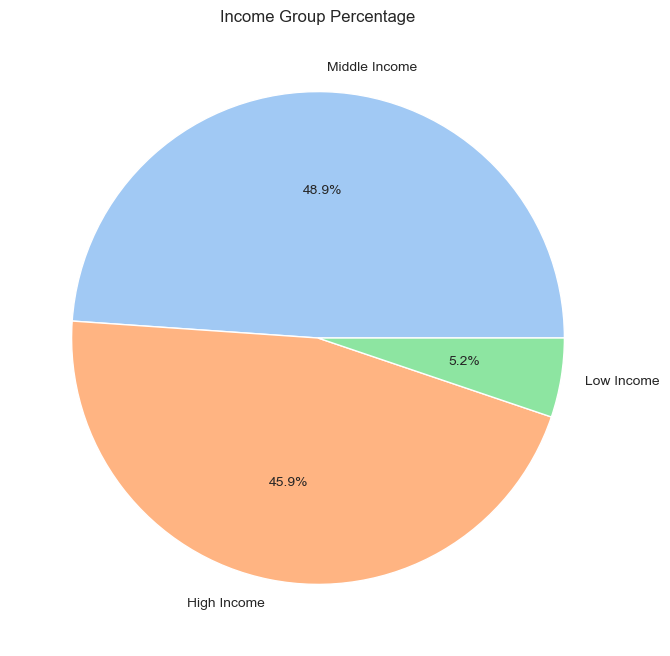

In [46]:
# Set the visual style
sns.set_style("whitegrid")

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(income_group_percentage, labels=income_group_percentage.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))

# Add title
plt.title('Income Group Percentage')

# Show the plot
plt.show()
